# Проверка гипотезы о математическом ожидании нормального распределения

**Цель занятия:** научиться проверять статистические гипотезы о среднем значении генеральной совокупности по одной выборке и строить доверительные интервалы.

## Содержание
1. Постановка задачи
2. Два классических подхода: z-тест и t-тест
3. Почему t-тест достаточен для всех случаев
4. Доверительные интервалы для математического ожидания
5. Практические примеры

## 1. Постановка задачи

Пусть имеется выборка $X_1, X_2, \ldots, X_n$ из нормального распределения 
$N(\mu, \sigma^2)$, где:
- $\mu$ — математическое ожидание (неизвестно)
- $\sigma^2$ — дисперсия (может быть известна или неизвестна)

**Задача:** проверить нулевую гипотезу $H_0: \mu = \mu_0$ против альтернативы:
- $H_1: \mu \neq \mu_0$ (двусторонняя)
- $H_1: \mu > \mu_0$ (правосторонняя)
- $H_1: \mu < \mu_0$ (левосторонняя)


In [2]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Настройка отображения
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Фиксируем генератор случайных чисел для воспроизводимости
rng = np.random.default_rng(42)

## 2. Два классических подхода

### Случай 1: Дисперсия $\sigma^2$ известна (z-тест)

Если дисперсия генеральной совокупности известна, используется статистика:

$$Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$$

При верной $H_0$ эта статистика имеет стандартное нормальное распределение: $Z \sim N(0, 1)$

### Случай 2: Дисперсия $\sigma^2$ неизвестна (t-тест)

Если дисперсия неизвестна и оценивается по выборке:

$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$$

то используется статистика:

$$T = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}$$

При верной $H_0$ эта статистика имеет распределение Стьюдента с $(n-1)$ степенями свободы: $T \sim t_{n-1}$

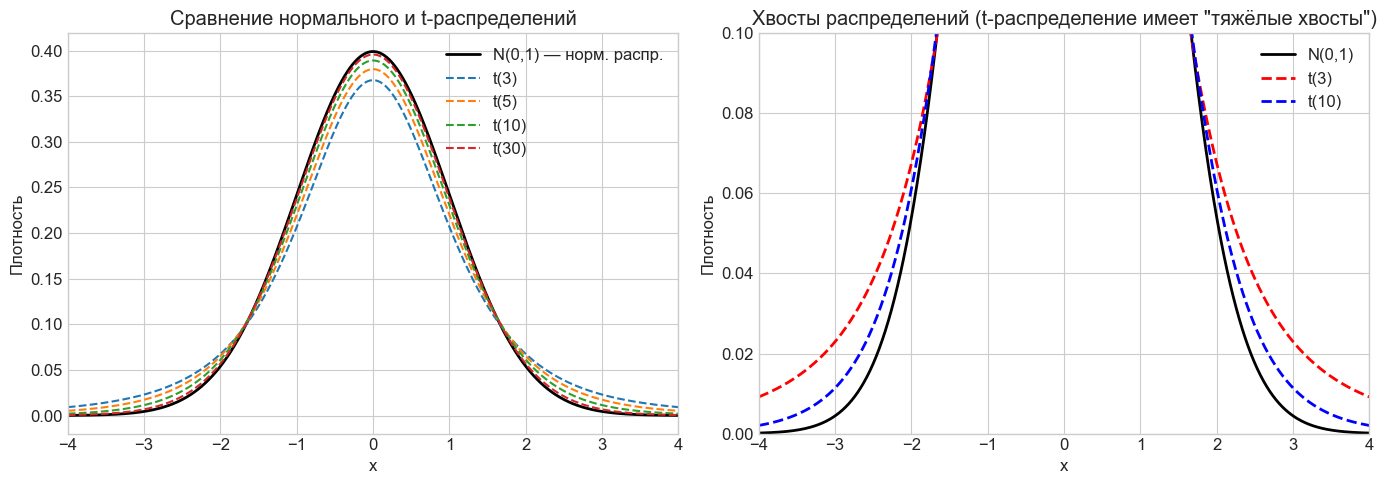

In [4]:
# Визуализация: сравнение нормального распределения и распределения Стьюдента

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-4, 4, 1000)

# График 1: Сравнение распределений при разных степенях свободы
ax1 = axes[0]
ax1.plot(x, stats.norm.pdf(x), 'k-', lw=2, label='N(0,1) — норм. распр.')
for df in [3, 5, 10, 30]:
    ax1.plot(x, stats.t.pdf(x, df), '--', lw=1.5, label=f't({df})')
ax1.set_xlabel('x')
ax1.set_ylabel('Плотность')
ax1.set_title('Сравнение нормального и t-распределений')
ax1.legend()
ax1.set_xlim(-4, 4)

# График 2: Хвосты распределений (различия более заметны)
ax2 = axes[1]
ax2.plot(x, stats.norm.pdf(x), 'k-', lw=2, label='N(0,1)')
ax2.plot(x, stats.t.pdf(x, 3), 'r--', lw=2, label='t(3)')
ax2.plot(x, stats.t.pdf(x, 10), 'b--', lw=2, label='t(10)')
ax2.set_xlabel('x')
ax2.set_ylabel('Плотность')
ax2.set_title('Хвосты распределений (t-распределение имеет "тяжёлые хвосты")')
ax2.legend()
ax2.set_xlim(-4, 4)
ax2.set_ylim(0, 0.1)  # Увеличим хвосты

plt.tight_layout()
plt.show()

## 3. Почему t-тест достаточен для всех случаев?

**Ключевой вопрос:** зачем нам два разных теста? Можно ли всегда использовать t-тест?

### Ответ: да, t-теста достаточно!

### Причина 1: Сходимость при больших выборках

При увеличении объёма выборки $n$ распределение Стьюдента $t_{n-1}$ сходится к стандартному нормальному распределению $N(0,1)$:

$$t_{n-1} \xrightarrow{n \to \infty} N(0,1)$$

Уже при $n \geq 30$ различие между ними практически незаметно.

In [5]:
# Демонстрация сходимости t-распределения к нормальному

print("Сравнение критических значений (уровень значимости α = 0.05, двусторонний тест)")
print("=" * 70)
print(f"{'n':>6} {'df':>6} {'t-критическое':>15} {'z-критическое':>15} {'Разница, %':>12}")
print("-" * 70)

z_crit = stats.norm.ppf(0.975)  # Критическое значение для N(0,1)

for n in [5, 10, 15, 20, 30, 50, 100, 500]:
    df = n - 1
    t_crit = stats.t.ppf(0.975, df)
    diff_percent = abs(t_crit - z_crit) / z_crit * 100
    print(f"{n:>6} {df:>6} {t_crit:>15.4f} {z_crit:>15.4f} {diff_percent:>12.2f}%")

print("-" * 70)
print(f"z-критическое значение (α=0.05, двуст.): {z_crit:.4f}")

Сравнение критических значений (уровень значимости α = 0.05, двусторонний тест)
     n     df   t-критическое   z-критическое   Разница, %
----------------------------------------------------------------------
     5      4          2.7764          1.9600        41.66%
    10      9          2.2622          1.9600        15.42%
    15     14          2.1448          1.9600         9.43%
    20     19          2.0930          1.9600         6.79%
    30     29          2.0452          1.9600         4.35%
    50     49          2.0096          1.9600         2.53%
   100     99          1.9842          1.9600         1.24%
   500    499          1.9647          1.9600         0.24%
----------------------------------------------------------------------
z-критическое значение (α=0.05, двуст.): 1.9600


### Причина 2: На практике дисперсия редко известна точно

В реальных исследованиях ситуация "дисперсия известна точно" почти не встречается:

- Даже если есть "историческое" значение $\sigma^2$, оно получено из прошлых данных и само является оценкой
- Условия эксперимента могли измениться
- "Известная" дисперсия — это скорее теоретическая абстракция для учебников

**Вывод:** использование t-теста — более честный и консервативный подход.

### Причина 3: t-тест даёт более широкие доверительные интервалы

t-распределение имеет более "тяжёлые хвосты", что означает:
- Критические значения t-теста больше, чем у z-теста
- Доверительные интервалы шире
- Меньше риск ошибки I рода (ложного отклонения $H_0$)

Это делает t-тест **консервативным** — он реже даёт ложноположительные результаты.

In [6]:
# Демонстрация: ширина доверительных интервалов

def confidence_interval_width(n, sigma, alpha=0.05):
    """
    Вычисляет ширину доверительного интервала для z-теста и t-теста.
    
    Параметры:
    ----------
    n : int
        Объём выборки
    sigma : float
        Стандартное отклонение
    alpha : float
        Уровень значимости
    
    Возвращает:
    -----------
    tuple : (ширина_z, ширина_t)
    """
    z_crit = stats.norm.ppf(1 - alpha/2)
    t_crit = stats.t.ppf(1 - alpha/2, n - 1)
    
    # Ширина ДИ = 2 * критическое_значение * sigma / sqrt(n)
    width_z = 2 * z_crit * sigma / np.sqrt(n)
    width_t = 2 * t_crit * sigma / np.sqrt(n)
    
    return width_z, width_t

# Сравнение при разных объёмах выборки
print("Сравнение ширины 95% доверительных интервалов (σ = 1)")
print("=" * 60)
print(f"{'n':>6} {'Ширина (z)':>15} {'Ширина (t)':>15} {'t шире на, %':>15}")
print("-" * 60)

for n in [5, 10, 20, 30, 50, 100]:
    w_z, w_t = confidence_interval_width(n, sigma=1)
    diff = (w_t - w_z) / w_z * 100
    print(f"{n:>6} {w_z:>15.4f} {w_t:>15.4f} {diff:>15.2f}%")

Сравнение ширины 95% доверительных интервалов (σ = 1)
     n      Ширина (z)      Ширина (t)    t шире на, %
------------------------------------------------------------
     5          1.7530          2.4833           41.66%
    10          1.2396          1.4307           15.42%
    20          0.8765          0.9360            6.79%
    30          0.7157          0.7468            4.35%
    50          0.5544          0.5684            2.53%
   100          0.3920          0.3968            1.24%


### Вывод: всегда используйте t-тест

| Ситуация | z-тест | t-тест |
|----------|--------|--------|
| Дисперсия известна, $n$ большое | ✓ точен | ✓ практически идентичен |
| Дисперсия известна, $n$ малое | ✓ точен | ✓ более консервативен |
| Дисперсия неизвестна, $n$ большое | ✗ некорректен | ✓ точен |
| Дисперсия неизвестна, $n$ малое | ✗ некорректен | ✓ точен |

**Практическое правило:** в Python используйте `scipy.stats.ttest_1samp()` — это универсальное решение для проверки гипотезы о среднем.

## 4. Доверительные интервалы для математического ожидания

**Доверительный интервал** — это интервал, который с заданной вероятностью $(1 - \alpha)$ накрывает истинное значение параметра.

### Формула для $(1-\alpha)$ доверительного интервала:

$$\bar{X} - t_{1-\alpha/2, n-1} \cdot \frac{S}{\sqrt{n}} < \mu < \bar{X} + t_{1-\alpha/2, n-1} \cdot \frac{S}{\sqrt{n}}$$
 
или короче:

$$\mu \in \left(\bar{X} \pm t_{1-\alpha/2, n-1} \cdot \frac{S}{\sqrt{n}}\right)$$

In [7]:
def confidence_interval_mean(data, confidence=0.95):
    """
    Вычисляет доверительный интервал для математического ожидания.
    
    Параметры:
    ----------
    data : array-like
        Выборка данных
    confidence : float
        Уровень доверия (по умолчанию 0.95)
    
    Возвращает:
    -----------
    tuple : (нижняя_граница, верхняя_граница, выборочное_среднее)
    """
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)  # Стандартная ошибка среднего = S / sqrt(n)
    
    # Критическое значение t-распределения
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    
    # Границы доверительного интервала
    margin = t_crit * se
    lower = mean - margin
    upper = mean + margin
    
    return lower, upper, mean


# Пример использования
sample = rng.normal(loc=100, scale=15, size=25)  # Выборка из N(100, 15²)

lower, upper, mean = confidence_interval_mean(sample, confidence=0.95)

print("Пример: доверительный интервал для среднего")
print("=" * 50)
print(f"Объём выборки: n = {len(sample)}")
print(f"Выборочное среднее: x̄ = {mean:.2f}")
print(f"Выборочное станд. откл.: s = {np.std(sample, ddof=1):.2f}")
print(f"95% доверительный интервал: ({lower:.2f}, {upper:.2f})")
print(f"Истинное μ = 100 попало в интервал: {lower <= 100 <= upper}")

Пример: доверительный интервал для среднего
Объём выборки: n = 25
Выборочное среднее: x̄ = 99.47
Выборочное станд. откл.: s = 12.47
95% доверительный интервал: (94.32, 104.62)
Истинное μ = 100 попало в интервал: True


### Альтернативный способ: использование `scipy.stats.t.interval()`

In [26]:
# Встроенная функция scipy для доверительного интервала

mean = np.mean(sample) # Среднее выборки
se = stats.sem(sample) # Стандартная ошибка среднего = S / sqrt(n)
n = len(sample) # Объём выборки

# Метод 1: через t.interval
ci_lower, ci_upper = stats.t.interval(confidence=0.95, df=n-1, loc=mean, scale=se)
print(f"95%-доверительный интервал: ({ci_lower:.2f}, {ci_upper:.2f})")

95%-доверительный интервал: (94.89, 107.52)


## 5. Практические примеры

### Пример 1: Контроль качества производства

**Задача:** На заводе производятся болты, номинальная длина которых должна быть 50 мм. Из партии взята случайная выборка из 20 болтов. Проверить гипотезу о том, что средняя длина болтов соответствует номиналу (уровень значимости α = 0.05).

In [12]:
# Данные измерений (в мм)
bolts = np.array([50.2, 49.8, 50.1, 49.9, 50.3, 50.0, 49.7, 50.4, 
                  50.1, 49.8, 50.2, 50.0, 49.9, 50.3, 49.8, 50.1,
                  50.0, 49.9, 50.2, 50.1])

In [13]:
# Гипотеза: H0: μ = 50 мм
mu_0 = 50.0
alpha = 0.05

In [14]:
# Выполняем t-тест
t_stat, p_value = stats.ttest_1samp(bolts, popmean=mu_0)

In [15]:
# Доверительный интервал
ci_lower, ci_upper, sample_mean = confidence_interval_mean(bolts, confidence=0.95)

In [16]:
print("Пример 1: Контроль качества болтов")
print("=" * 60)
print(f"\nИсходные данные:")
print(f"  Объём выборки: n = {len(bolts)}")
print(f"  Выборочное среднее: x̄ = {sample_mean:.3f} мм")
print(f"  Выборочное станд. откл.: s = {np.std(bolts, ddof=1):.3f} мм")
print(f"  Номинальное значение: μ₀ = {mu_0} мм")

print(f"\nРезультаты t-теста:")
print(f"  t-статистика: t = {t_stat:.4f}")
print(f"  p-значение (двусторонний): p = {p_value:.4f}")

print(f"\n95% доверительный интервал для μ:")
print(f"  ({ci_lower:.3f}, {ci_upper:.3f}) мм")

print(f"\nВывод при α = {alpha}:")
if p_value < alpha:
    print(f"  p = {p_value:.4f} < α = {alpha}")
    print("  → Отвергаем H₀: средняя длина болтов отличается от 50 мм")
else:
    print(f"  p = {p_value:.4f} ≥ α = {alpha}")
    print("  → Не отвергаем H₀: нет оснований считать, что средняя длина")
    print("    болтов отличается от номинала 50 мм")

Пример 1: Контроль качества болтов

Исходные данные:
  Объём выборки: n = 20
  Выборочное среднее: x̄ = 50.040 мм
  Выборочное станд. откл.: s = 0.193 мм
  Номинальное значение: μ₀ = 50.0 мм

Результаты t-теста:
  t-статистика: t = 0.9267
  p-значение (двусторонний): p = 0.3657

95% доверительный интервал для μ:
  (49.950, 50.130) мм

Вывод при α = 0.05:
  p = 0.3657 ≥ α = 0.05
  → Не отвергаем H₀: нет оснований считать, что средняя длина
    болтов отличается от номинала 50 мм


### Пример 2: Односторонняя альтернатива

**Задача:** Производитель утверждает, что средний срок службы батареек составляет не менее 500 часов. Проверить это утверждение по выборке из 15 батареек.

In [17]:
# Данные о сроке службы батареек (в часах)
batteries = np.array([485, 512, 478, 495, 502, 488, 510, 492, 
                      499, 505, 481, 498, 507, 490, 503])

In [18]:
# Гипотеза: H0: μ ≥ 500 часов vs H1: μ < 500 часов (левосторонняя)
mu_0 = 500
alpha = 0.05

In [22]:
# t-тест Для левосторонней альтернативы (H1: μ < μ₀)

t_stat, p_value_left = stats.ttest_1samp(batteries, popmean=mu_0, alternative='less')

In [23]:
sample_mean = np.mean(batteries)
sample_std = np.std(batteries, ddof=1)

print("Пример 2: Проверка срока службы батареек")
print("=" * 60)
print(f"\nИсходные данные:")
print(f"  Объём выборки: n = {len(batteries)}")
print(f"  Выборочное среднее: x̄ = {sample_mean:.2f} часов")
print(f"  Выборочное станд. откл.: s = {sample_std:.2f} часов")

print(f"\nГипотезы:")
print(f"  H₀: μ ≥ {mu_0} часов (утверждение производителя верно)")
print(f"  H₁: μ < {mu_0} часов (утверждение производителя неверно)")

print(f"\nРезультаты t-теста:")
print(f"  t-статистика: t = {t_stat:.4f}")
print(f"  p-значение (левостороннее): p = {p_value_left:.4f}")

print(f"\nВывод при α = {alpha}:")
if p_value_left < alpha:
    print(f"  p = {p_value_left:.4f} < α = {alpha}")
    print("  → Отвергаем H₀: средний срок службы меньше заявленных 500 часов")
else:
    print(f"  p = {p_value_left:.4f} ≥ α = {alpha}")
    print("  → Не отвергаем H₀: нет оснований считать, что производитель")
    print("    завышает срок службы батареек")

Пример 2: Проверка срока службы батареек

Исходные данные:
  Объём выборки: n = 15
  Выборочное среднее: x̄ = 496.33 часов
  Выборочное станд. откл.: s = 10.48 часов

Гипотезы:
  H₀: μ ≥ 500 часов (утверждение производителя верно)
  H₁: μ < 500 часов (утверждение производителя неверно)

Результаты t-теста:
  t-статистика: t = -1.3552
  p-значение (левостороннее): p = 0.0984

Вывод при α = 0.05:
  p = 0.0984 ≥ α = 0.05
  → Не отвергаем H₀: нет оснований считать, что производитель
    завышает срок службы батареек


### Пример 3: Визуализация доверительных интервалов

Проведём моделирование: построим 100 доверительных интервалов и посмотрим, 
какая доля из них накрывает истинное значение параметра.

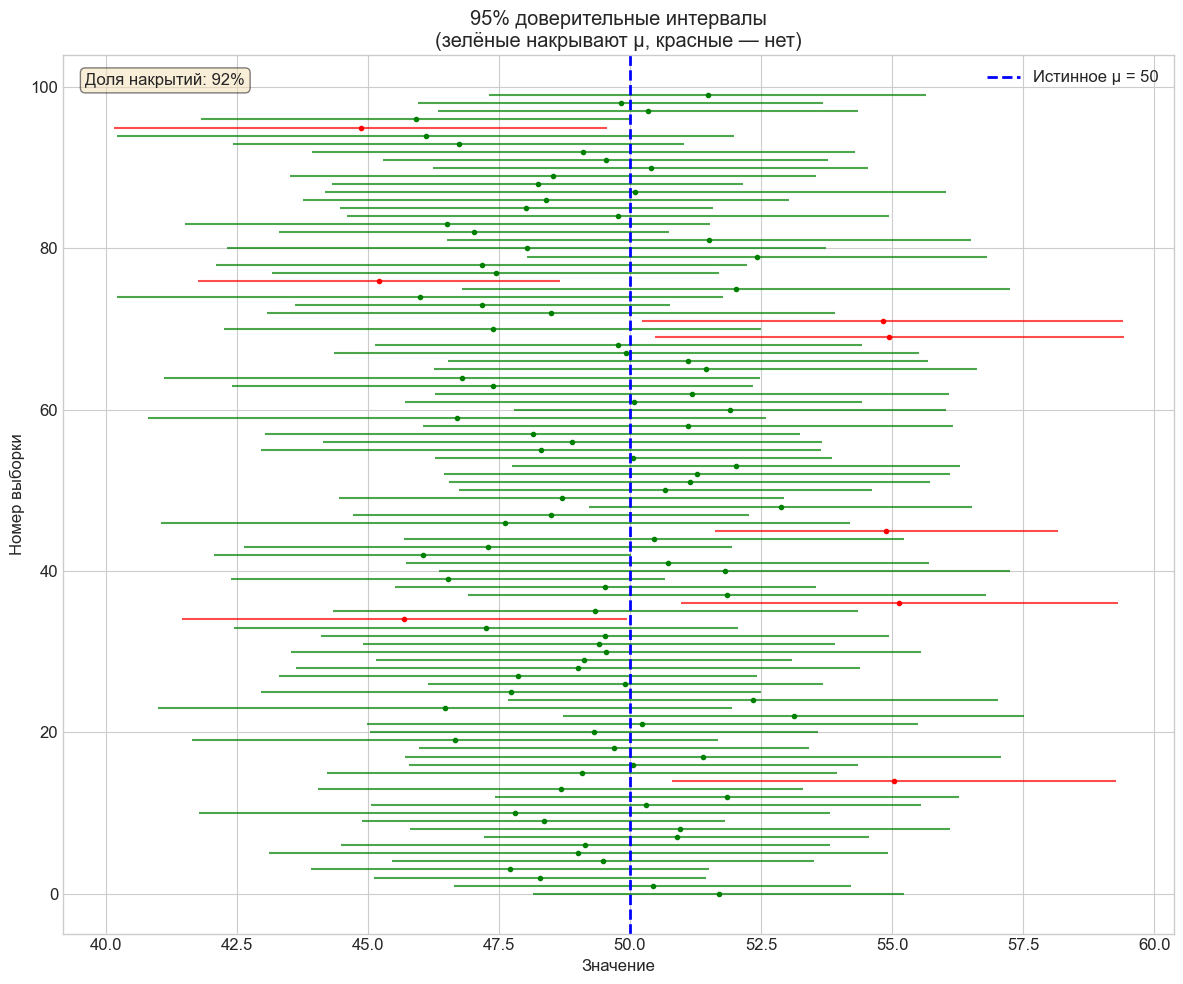


Теоретическая доля накрытий: 95%
Фактическая доля накрытий: 92%


In [24]:
# Моделирование: 100 выборок, 100 доверительных интервалов

mu_true = 50       # Истинное математическое ожидание
sigma_true = 10    # Истинное стандартное отклонение
n = 20             # Объём каждой выборки
confidence = 0.95  # Уровень доверия
n_simulations = 100

# Генерируем выборки и строим доверительные интервалы
intervals = []
covers_true = []

for i in range(n_simulations):
    sample = rng.normal(loc=mu_true, scale=sigma_true, size=n)
    lower, upper, mean = confidence_interval_mean(sample, confidence)
    intervals.append((lower, upper, mean))
    covers_true.append(lower <= mu_true <= upper)

# Визуализация
fig, ax = plt.subplots(figsize=(12, 10))

for i, (lower, upper, mean) in enumerate(intervals):
    color = 'green' if covers_true[i] else 'red'
    ax.hlines(y=i, xmin=lower, xmax=upper, color=color, alpha=0.7)
    ax.plot(mean, i, 'o', color=color, markersize=3)

ax.axvline(x=mu_true, color='blue', linestyle='--', linewidth=2, 
           label=f'Истинное μ = {mu_true}')
ax.set_xlabel('Значение')
ax.set_ylabel('Номер выборки')
ax.set_title(f'{int(confidence*100)}% доверительные интервалы\n'
             f'(зелёные накрывают μ, красные — нет)')
ax.legend()

coverage = sum(covers_true) / n_simulations * 100
ax.text(0.02, 0.98, f'Доля накрытий: {coverage:.0f}%', 
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nТеоретическая доля накрытий: {confidence*100:.0f}%")
print(f"Фактическая доля накрытий: {coverage:.0f}%")

## Пример 4: Связь доверительного интервала и проверки гипотезы

**Важное свойство:** гипотеза $H_0: \mu = \mu_0$ отвергается на уровне $\alpha$ тогда и только тогда, когда $\mu_0$ не входит в $(1-\alpha)$ доверительный интервал.

In [25]:
# Демонстрация связи ДИ и проверки гипотезы

sample = rng.normal(loc=100, scale=15, size=30)

# Построим 95% ДИ
ci_lower, ci_upper, sample_mean = confidence_interval_mean(sample, confidence=0.95)

print("Связь доверительного интервала и проверки гипотезы")
print("=" * 60)
print(f"\n95% ДИ для μ: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"Выборочное среднее: {sample_mean:.2f}")

# Проверим несколько гипотез
test_values = [90, 95, 100, 105, 110]

print(f"\n{'μ₀':>6} {'В ДИ?':>10} {'p-value':>12} {'Отвергаем H₀?':>15}")
print("-" * 45)

for mu_0 in test_values:
    in_ci = ci_lower <= mu_0 <= ci_upper
    _, p_value = stats.ttest_1samp(sample, popmean=mu_0)
    reject = p_value < 0.05
    
    in_ci_str = "Да" if in_ci else "Нет"
    reject_str = "Да" if reject else "Нет"
    
    print(f"{mu_0:>6} {in_ci_str:>10} {p_value:>12.4f} {reject_str:>15}")

print("\nОбратите внимание: μ₀ вне ДИ ↔ H₀ отвергается (p < 0.05)")

Связь доверительного интервала и проверки гипотезы

95% ДИ для μ: (94.89, 107.52)
Выборочное среднее: 101.20

    μ₀      В ДИ?      p-value   Отвергаем H₀?
---------------------------------------------
    90        Нет       0.0011              Да
    95         Да       0.0538             Нет
   100         Да       0.6995             Нет
   105         Да       0.2285             Нет
   110        Нет       0.0080              Да

Обратите внимание: μ₀ вне ДИ ↔ H₀ отвергается (p < 0.05)


## 6. Ключевые выводы

1. **t-тест универсален**: используйте его всегда для проверки гипотезы о среднем

2. **При больших n различий нет**: t-распределение сходится к нормальному

3. **t-тест консервативен**: даёт более широкие ДИ, что снижает риск ошибки I рода

4. **Связь ДИ и теста**: μ₀ вне $(1-\alpha)$ ДИ ↔ H₀ отвергается на уровне α

5. **В Python**: используйте `scipy.stats.ttest_1samp()` с параметром `alternative`

### Краткая шпаргалка по scipy.stats

```python
# t-тест для одной выборки
from scipy import stats

# Двусторонний тест (H1: μ ≠ μ₀)
t_stat, p_value = stats.ttest_1samp(data, popmean=mu_0)

# или Двусторонний тест (H1: μ ≠ μ₀) 
t_stat, p_value = stats.ttest_1samp(data, popmean=mu_0, alternative='two-sided')

# Правосторонний тест (H1: μ > μ₀)
t_stat, p_value = stats.ttest_1samp(data, popmean=mu_0, alternative='greater')

# Левосторонний тест (H1: μ < μ₀)
t_stat, p_value = stats.ttest_1samp(data, popmean=mu_0, alternative='less')

# Доверительный интервал
mean = np.mean(data)
se = stats.sem(data)
ci = stats.t.interval(confidence=0.95, df=len(data)-1, loc=mean, scale=se)
```